Actual: [30760 32001  9549 11850 28248  7799  7788  9258 10198  7775 13295  8238
 18280  9988 40960  6488  5151 12629  8189  9960  8495 13499  8249  6479
  6692 41315  9639 13415  7999 12940 25552  6229  7898 21485  7689 28176
 11259 10945  4587 14489  7463 18344 15580  6918  7499  9095  6229  7053
 16900 12964  6295 16558]
Predicted: [17666.8 19756.   8422.6 14731.8 28598.2  6729.   8693.8  7471.6  8455.
  8601.4 17265.6  7747.  11777.   9294.4 35796.8  6692.2  6046.6 14336.8
  9365.   8120.6 10032.6 16417.   6729.   6106.4  6509.6 21068.8 10324.4
 18203.   6729.  17135.  25177.   6509.6  8690.6 19756.   8412.2 25177.
  9588.2 14898.   6216.6 15811.2  8690.6 15613.2 14935.6  8690.6  6729.
 12078.   6509.6  8343.8 17330.  14336.8  6182.  16832.2]
***********************************************************************
Mean Square Error 18497584.205384616
R-Sqaure Value: 0.75


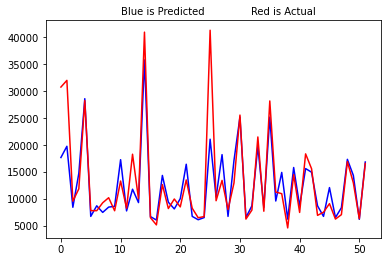

In [145]:
import numpy as np 
import pandas as pd 

text = open("KNN_Automobile_data.csv", "r")
text = ''.join([i for i in text]) \
    .replace("?", "0")
x = open("output.csv","w")
x.writelines(text)
x.close()

data=pd.read_csv('output.csv')
x=data.iloc[:,:25].to_numpy()
y=data.iloc[:,25].to_numpy()
#performing label endoing on the in the dataset 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])
x[:,3]=le.fit_transform(x[:,3])
x[:,4]=le.fit_transform(x[:,4])
x[:,5]=le.fit_transform(x[:,5])
x[:,6]=le.fit_transform(x[:,6])
x[:,7]=le.fit_transform(x[:,7])
x[:,8]=le.fit_transform(x[:,8])
x[:,14]=le.fit_transform(x[:,14])
x[:,15]=le.fit_transform(x[:,15])
x[:,17]=le.fit_transform(x[:,17])

#performing imputing on the missing values 
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit_transform(x)

#perfroming scaling to normalize the data 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(x)
ss.fit_transform(y.reshape(1,-1))

#splitting the data set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x_train,y_train)

y_pred=neigh.predict(x_test)

import matplotlib.pyplot as plt
import seaborn as sns 
plt.plot(y_pred,color='blue')
plt.plot(y_test,color='red')
plt.figtext(.6, .9, "Red is Actual")
plt.figtext(.3, .9, "Blue is Predicted")


print("Actual:", y_test)
print("Predicted:", y_pred)


print("***********************************************************************")
# Mean Square Error on Test Set
from sklearn.metrics import mean_squared_error
print("Mean Square Error", mean_squared_error(y_pred, y_test))

# R-Square
from sklearn.metrics import r2_score
print("R-Sqaure Value: " + str(round(r2_score(y_test, y_pred), 2)))






